In [24]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [26]:
signal_frequency = 50  # in Hz

In [27]:
music = wavfile.read('data/Hayloft_II_input.wav')

In [28]:
music

(44100, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

In [29]:
fs = music[0]
sound_data = music[1]

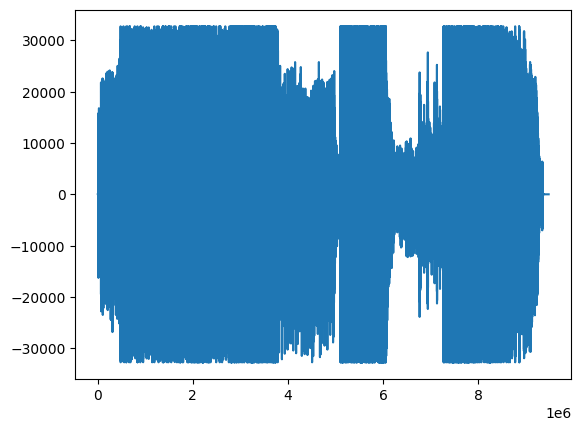

In [30]:
plt.plot(sound_data)

In [31]:
length = (sound_data.shape[0] // fs)  # in seconds

length

215

In [32]:
sound_data = sound_data[:fs * length]

In [33]:
# scale the data
sound_data = sound_data / np.max(np.abs(sound_data))


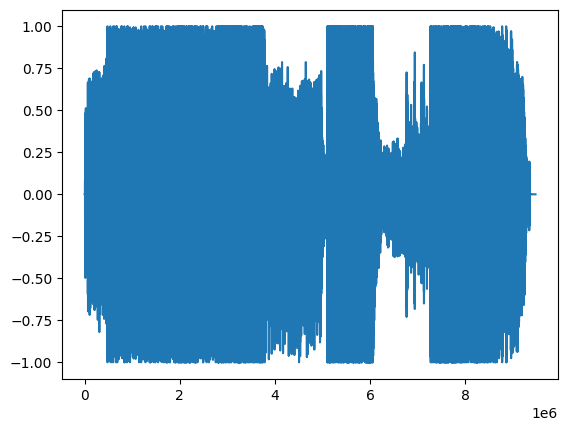

In [34]:
plt.plot(sound_data)

In [35]:
bit_duration = 0.4  # in seconds
bit_sample_duration = int(fs * bit_duration)
bit_sample_duration

17640

In [36]:
code_encode = "votre code : 5739. regardez le LSB de chaque pixel de l'image"
# convert code to binary string forcing it to be 8 bits long
caracters_values = [ord(c) for c in code_encode]
code_string = ''.join([format(c, '08b') for c in caracters_values])
print(code_string)
code_string = code_string + format(4, '08b')
code_string, len(code_string)

01110110011011110111010001110010011001010010000001100011011011110110010001100101001000000011101000100000001101010011011100110011001110010010111000100000011100100110010101100111011000010111001001100100011001010111101000100000011011000110010100100000010011000101001101000010001000000110010001100101001000000110001101101000011000010111000101110101011001010010000001110000011010010111100001100101011011000010000001100100011001010010000001101100001001110110100101101101011000010110011101100101


('0111011001101111011101000111001001100101001000000110001101101111011001000110010100100000001110100010000000110101001101110011001100111001001011100010000001110010011001010110011101100001011100100110010001100101011110100010000001101100011001010010000001001100010100110100001000100000011001000110010100100000011000110110100001100001011100010111010101100101001000000111000001101001011110000110010101101100001000000110010001100101001000000110110000100111011010010110110101100001011001110110010100000100',
 496)

In [37]:
signal_data = np.zeros((fs * length,))
print("signal_data shape: ", signal_data.shape)
print("space that will be used by data: ", bit_sample_duration * len(code_string))
assert bit_sample_duration * len(code_string) < signal_data.shape[0]

signal_data shape:  (9481500,)
space that will be used by data:  8749440


In [38]:
signal_data[2 * bit_sample_duration:(2 + 1) * bit_sample_duration].shape

(17640,)

In [39]:
np.sin(
            2 * np.pi * signal_frequency * np.linspace(
                2 * bit_sample_duration,
                (2 + 1) * bit_sample_duration,
                bit_sample_duration
            )
        ).shape

(17640,)

In [40]:
for i in range(len(code_string)):
    if code_string[i] == '1':
        signal_data[i * bit_sample_duration:(i + 1) * bit_sample_duration] = np.sin(
            2 * np.pi * signal_frequency * np.linspace(
                i * bit_sample_duration,
                (i + 1) * bit_sample_duration,
                bit_sample_duration
            )
        )


In [41]:
final_audio = sound_data + signal_data * 0.5

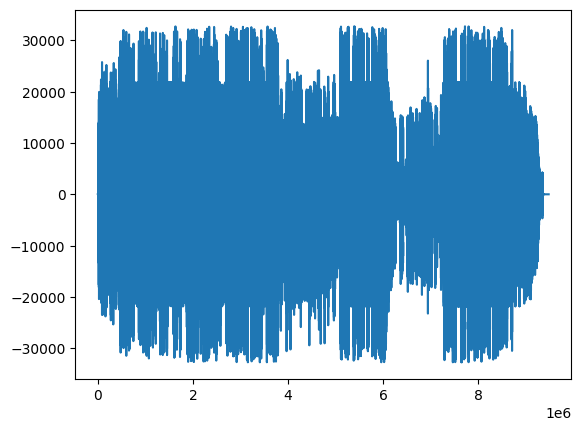

In [42]:
final_audio = final_audio / np.max(np.abs(final_audio))
final_audio = final_audio * 32767
plt.plot(final_audio)

In [43]:
wavfile.write("output/Hayloft_II_output.wav", fs, final_audio.astype(np.int16))

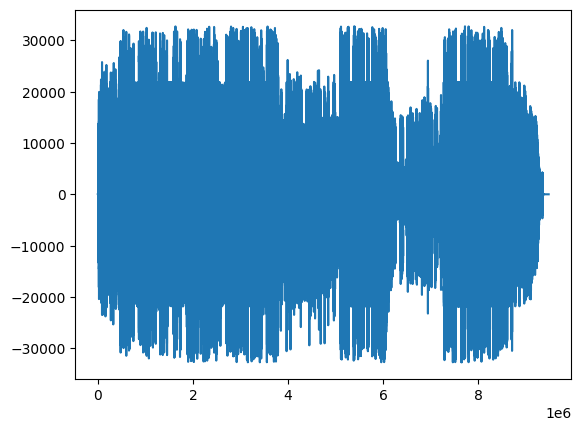

In [44]:
written_file = wavfile.read("output/Hayloft_II_output.wav")
plt.plot(written_file[1])